# Exercises:
- E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
- E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
- E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
- E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
- E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
- E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [1]:
#import
import torch

**E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?**

In [2]:
#list of names without new line
words = open("names.txt", "r").read().splitlines()

In [3]:
#creates trigrams with start end special characters 
#and count them creating a dictionary
t = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [4]:
#sort using the temporaneous function lambda using the values of the dict
#; is to suppress the print output
sorted(t.items(), key = lambda kv: -kv[1]);

In [5]:
N = torch.zeros((27,27,27), dtype=torch.int32)

In [6]:
#the alphabet and its map with integers
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [7]:
for w in words:
    chs = ["."] + ["."] + list(w) + ["."] + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[ix1,ix2,ix3] +=1
        
d = 1

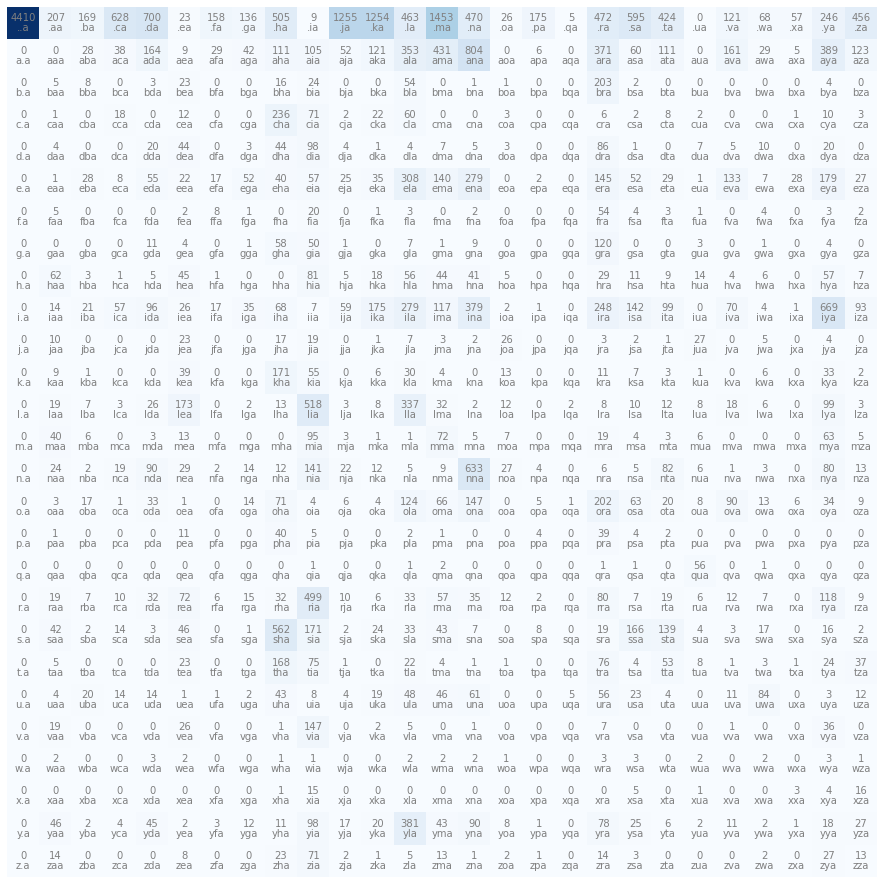

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N[:,:,d], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] + itos[d]
        plt.text(j, i, chstr, ha="center", va="top", color='gray')
        plt.text(j, i, N[i,j,d].item(), ha="center", va="bottom", color="gray")
plt.axis("off"); 

In [9]:
#sum along 1 because prob is element divided by total along rows
g = torch.Generator().manual_seed(2147483647)
P = (N+1).float()
p = torch.clone(P)
P /= P.sum(2, keepdims=True)
P.shape
print(p[0,0,d], p.sum(2, keepdims=True)[0,0,0])
p[0,0,d] /= p.sum(2, keepdims=True)[0,0,0]
print(p[0,0,d], P[0,0,d])
#why sum along rows and columns give the same result?

tensor(4411.) tensor(32060.)
tensor(0.1376) tensor(0.1376)


In [13]:
#sampling from the distribution
for i in range(5):
    out = []
    ix1 = 0
    ix2 = 0
    while True:
        p = P[ix1,ix2]
        ix1 = ix2
        ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

crewina.
lanoxvkyrina.
khine.
trise.
koberseberryslot.


### implementation using a bidimentional matrix

In [57]:
dstoi = {}

for i,s1 in enumerate(["."]+chars):
    dstoi.update({s1 + s2:i*26+j+1 for j,s2 in enumerate(chars)})
dstoi.update({s2 + ".":27*26+j+1 for j,s2 in enumerate(chars)})
dstoi[".."] = 0
ditos = {i:s for s,i in dstoi.items()}
dstoi

{'.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'aa': 27,
 'ab': 28,
 'ac': 29,
 'ad': 30,
 'ae': 31,
 'af': 32,
 'ag': 33,
 'ah': 34,
 'ai': 35,
 'aj': 36,
 'ak': 37,
 'al': 38,
 'am': 39,
 'an': 40,
 'ao': 41,
 'ap': 42,
 'aq': 43,
 'ar': 44,
 'as': 45,
 'at': 46,
 'au': 47,
 'av': 48,
 'aw': 49,
 'ax': 50,
 'ay': 51,
 'az': 52,
 'ba': 53,
 'bb': 54,
 'bc': 55,
 'bd': 56,
 'be': 57,
 'bf': 58,
 'bg': 59,
 'bh': 60,
 'bi': 61,
 'bj': 62,
 'bk': 63,
 'bl': 64,
 'bm': 65,
 'bn': 66,
 'bo': 67,
 'bp': 68,
 'bq': 69,
 'br': 70,
 'bs': 71,
 'bt': 72,
 'bu': 73,
 'bv': 74,
 'bw': 75,
 'bx': 76,
 'by': 77,
 'bz': 78,
 'ca': 79,
 'cb': 80,
 'cc': 81,
 'cd': 82,
 'ce': 83,
 'cf': 84,
 'cg': 85,
 'ch': 86,
 'ci': 87,
 'cj': 88,
 'ck': 89,
 'cl': 90,
 'cm': 91,
 'cn': 9

In [52]:
#implementation using a bidimentional matrix
Nd = torch.zeros((27*27,27), dtype=torch.int32)
for w in words[:]:
    chs = ["."] + ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = dstoi[ch1+ch2]
        ix2 = stoi[ch3]
        Nd[ix1,ix2] +=1
        #print(ch1,ch2,ch3,ix1,ix2)


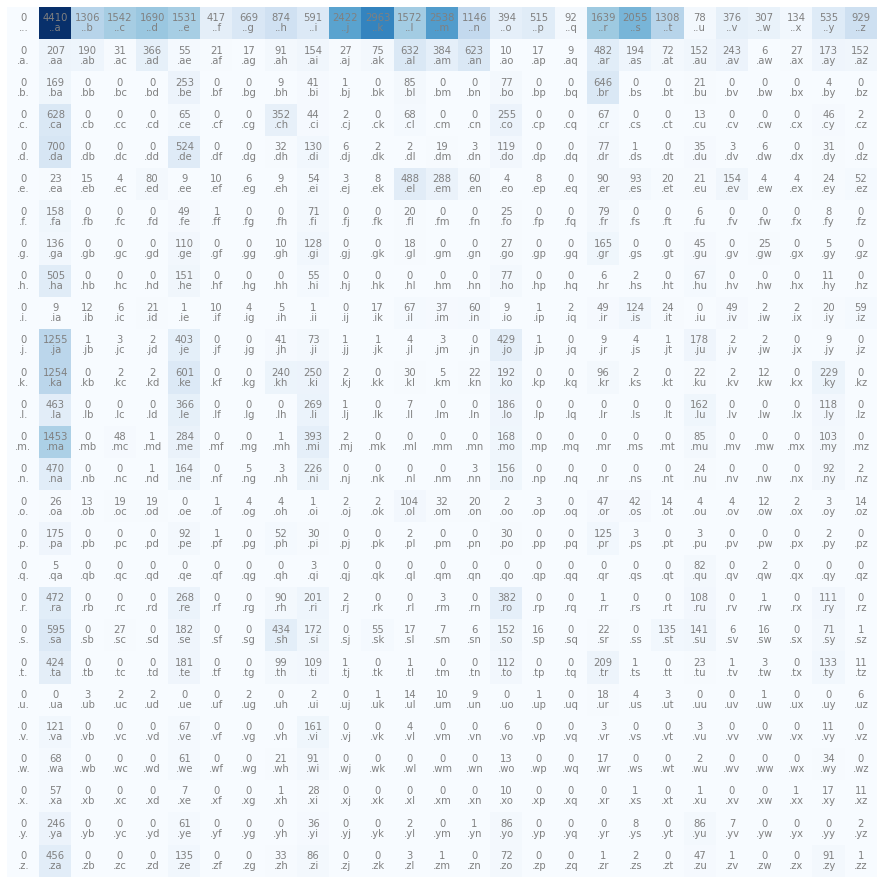

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(Nd[:27,:], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = ditos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="top", color='gray')
        plt.text(j, i, Nd[i,j].item(), ha="center", va="bottom", color="gray")
plt.axis("off"); 

In [65]:
g = torch.Generator().manual_seed(2147483647)
P = (Nd+1).float()
P /= P.sum(1, keepdims=True)

In [66]:
#sampling from the distribution
for i in range(5):
    out = []
    ix1 = '..'
    while True:
        
        p = P[dstoi[ix1]]
        ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        ix2 = itos[ix2]
        out.append(ix2)
        ix1 = ix1[1:] + ix2
        if ix2 == '.':
            break
    print(''.join(out))

miq.
axx.
mereyannyaar.
knooraen.
el.


# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
- equivalent to maximizing the log likelihood (because log is monotonic)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood

## oss

 log(a*b*c) = log(a) + log(b) + log(c)
 log(a*b*c) = log(a) + log(b) + log(c)  
 ll=a*b*c...

The likelihood of a dataset is the probability assigned by the model on that dataset. 
essentially which is the prob of anna given the bigram modelling of the dataset? it's the likelihood
This can be expressed as a product of likelihood of data points assuming independence.

In [67]:
#calculate the loglikelihood for the dataset given his pdf
#when I say max ll is because I want that those words need to have the max ll given the p dist of the data 

log_likelihood = 0.0
n = 0

for w in words:
    chs = ["."] + ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = dstoi[ch1+ch2]
        ix2 = stoi[ch3]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')        

#this is how much is probable our dataset given 
#such prob distribution retieved from databigrams


log_likelihood=tensor(-504653.)
nll=tensor(504653.)
2.2119739055633545


In [68]:
#dataset generation
xs, ys = [], []

for w in words:
    chs = ["."] + ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = dstoi[ch1+ch2]
        ix2 = stoi[ch3]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
xs[:10], ys[:10]

(tensor([  0,   5, 143, 351, 339,   0,  15, 402, 321, 256]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9]))

Note that the weights with values in (-inf, +inf) are interpreted as log-counts which are then exponentiated to get units of count that have values in (0, +inf). These values are normalized to get an output vector with values in (0, 1) which we interpret as a probability distribution. This is actually just taking the softmax of the row of weights. Training the network will make these interpretations valid.

## Regularization
Observe that smoothing the count matrix approximates to it having constant entries. In the context of the neural net model, this means having a zero weight matrix so that the resulting count matrix W.exp() is a matrix of ones. So the more getting zero weights is incentivized in the loss function, the more uniform the resulting distribution is. This is precisely weight regularization. For example, we can add 
 
$\frac{α}{n}‖W‖^{2}_2$ where n=|W| to the loss function:

$$loss += 0.1 * model.W.square().mean()$$

This acts like a force that pushes the weights to zero whenever its magnitude increases to try to reduce the NLL loss.

In [69]:
import torch.nn.functional as F

W = torch.randn((27*27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27*27).float()

In [70]:
#optimization
losses = []

for t in range(500):
    logits = xenc @ W
    #print(xenc.shape, W.shape, logits.shape, num, ys.shape)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(ys)),ys].log().mean() #+ 0.01*(W**2).mean()
    losses.append(loss.item())
    if t % 10 == 9:
         print(f"[{t+1:>03d}/{500}]   loss={loss:.4f}")


    
    W.grad = None
    loss.backward()
    
    W.data += -100 * W.grad

[010/500]   loss=2.9841
[020/500]   loss=2.7571
[030/500]   loss=2.6393
[040/500]   loss=2.5639
[050/500]   loss=2.5113
[060/500]   loss=2.4726
[070/500]   loss=2.4428
[080/500]   loss=2.4189
[090/500]   loss=2.3994
[100/500]   loss=2.3830
[110/500]   loss=2.3690
[120/500]   loss=2.3570
[130/500]   loss=2.3464
[140/500]   loss=2.3372
[150/500]   loss=2.3289
[160/500]   loss=2.3215
[170/500]   loss=2.3149
[180/500]   loss=2.3088
[190/500]   loss=2.3034
[200/500]   loss=2.2984
[210/500]   loss=2.2938
[220/500]   loss=2.2895
[230/500]   loss=2.2856
[240/500]   loss=2.2820
[250/500]   loss=2.2787
[260/500]   loss=2.2756
[270/500]   loss=2.2727
[280/500]   loss=2.2700
[290/500]   loss=2.2674
[300/500]   loss=2.2651
[310/500]   loss=2.2628
[320/500]   loss=2.2607
[330/500]   loss=2.2587
[340/500]   loss=2.2569
[350/500]   loss=2.2551
[360/500]   loss=2.2534
[370/500]   loss=2.2518
[380/500]   loss=2.2503
[390/500]   loss=2.2489
[400/500]   loss=2.2475
[410/500]   loss=2.2462
[420/500]   loss

In [81]:
#sampling from net
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27*27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item()
        if ix == 0:
            break
        out.append(itos[ix])
        
    print("".join(out))
    

bamayurizamanonyanaralayivananozaraaximabraaranyaralurananivizelisharenimishastuheramamaautifaiskanelayemakileshadamavayotelemyastralemalelulabemalolurostaritolelolozashasin
kabravivilinisuainamomamirhaaroanaicaneviloshuneloboryakesoshelijowgaumamosorotarolurarispalivavayanalosasamalyanhololistyasizameloilulaashusherotasamiablasarevinaanaharazademilugevimoxwpavelelaelisinamaizadiszananivisyamuvaalevilimadodyoprvanilamiselyuizizerizelaamamaraludedadedalirayobrililamaerisamaikilobemicaanauaarabomilacladamyezaurithocavypadryulaabriorelemizevesutolyihelinalaalalisilanesirbayazkilemurosaunadadaniabraneiliselanisorowhemeveshiliremaianolyuralielamisaralalililulemaminosavelaygirayurutadziligabruprysanademisurjoixadyoaramaroluryaitadishavivalevadabelolemaakadamaveizoxilelyaadodunablulesthevemasaastyaelulirelemaamadunalitelarenasurelachemeriaalelulaxizulimaaluqumidaizimadazivisemyainilasanyomahaaredujalunanaulemilalolilaegeluxdrevyayalimelinesulauzyibolyudistropakanavanohularosinazayalalibemabev

In [45]:
WW = torch.clone(W)

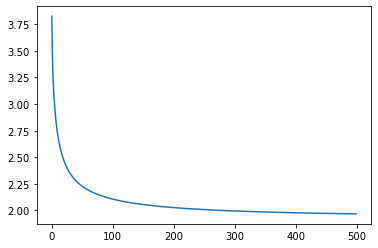

In [46]:
import matplotlib.pyplot as plt
plt.plot(losses)